In [1]:
import sys
import matplotlib as mpl
sys.path.append('../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet
% matplotlib inline

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [2]:
ver=0
datapath = '../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/poster_2017_07_08_'
figname = 'one'

#### Figure: Perfect v. Imperfect Learning ####

In [3]:
## Data
test_case_list = [27, 19]
variation_list = [5, 5]
undersampl_scale_on =0
sig_scale_on=0

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 27 5
Total coeff 8.88934261852 0.00358368674437
LKFFB
I am in RISK DICT and test case and variations are: 27 5


../../../../data_tools/data_tuned_run_analysis.py:275: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (freq_basis_array == None) and (instantA == None):


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 27 5
(27, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 19 5
Total coeff 651.779417919 0.00014780310704
LKFFB
I am in RISK DICT and test case and variations are: 19 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
(19, 5)


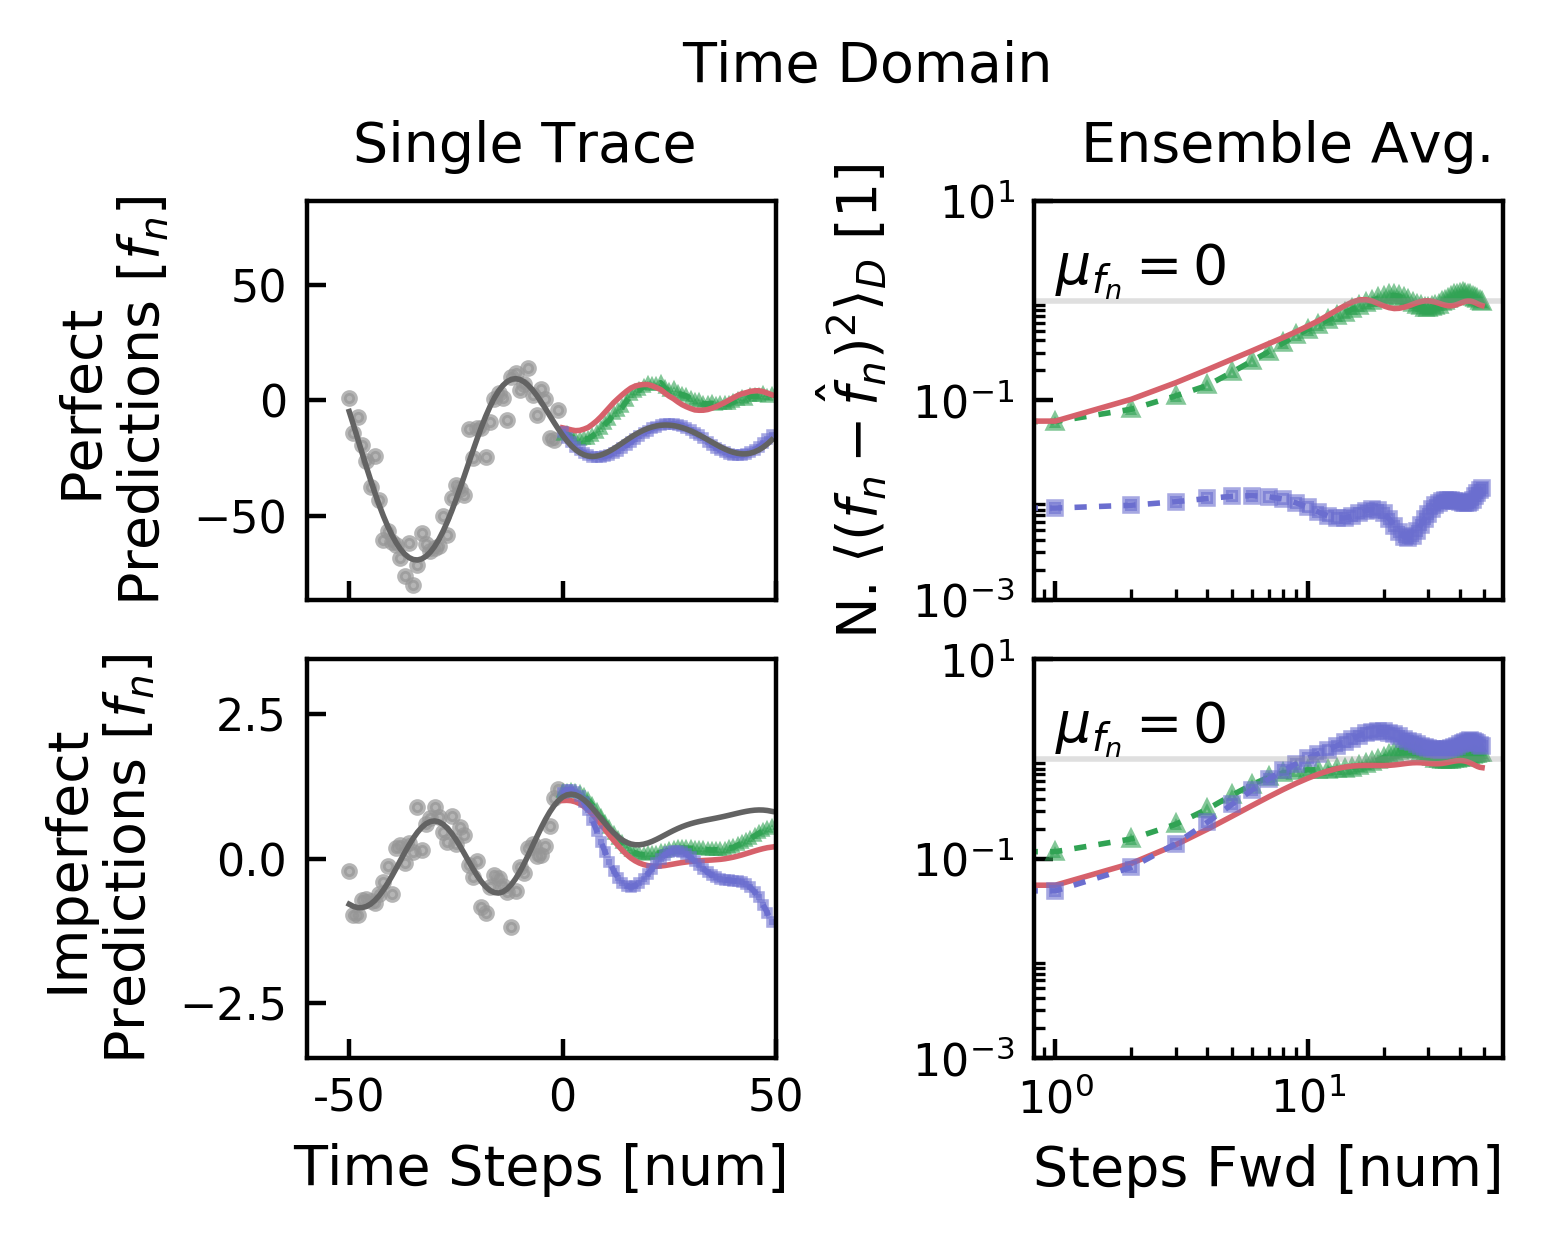

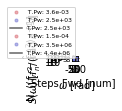

In [4]:
## Fig Setup
nrows = 2
ncols = 2


gs = gridspec.GridSpec(nrows, ncols,
                       left=0.2, right=0.96, 
                       top=0.83, bottom=0.15, 
                       wspace=0.55, hspace=0.15)

fig = plt.figure(figsize=(cm2inch(10.), cm2inch(8.)), dpi=my_dpi)
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(121)
dumpax2 = dumpfig.add_subplot(122)


for idx_c in xrange(len(test_case_list)):
    
    vars()['ax'+str(idx_c)+'_1']  = fig.add_subplot(gs[idx_c, 0])
    vars()['ax'+str(idx_c)+'_2']  = fig.add_subplot(gs[idx_c, 1])
    
    # Single Predictions
    
    if test_case_list[idx_c] ==19:
        sig_scale_on = 1.
        undersampl_scale_on = 1.
        
    vars()['ax'+str(idx_c)+'_1'], dumpax2 = psp(vars()['ax'+str(idx_c)+'_1'], dumpax2,  
                                                                     ['LSF', 'AKF', 'LKFFB'], 
                                                                    test_case_list[idx_c], variation_list[idx_c], 
                                                                    datapath, GPRP_load='No', ylim_amps = [-8, 0],
                                                                    fstep=50, sstep=50, lowloss=20, 
                                                                    sig_scale_on=sig_scale_on, undersampl_scale_on=undersampl_scale_on)
    
    
    # N. Log(BR)
    
    dumpax, vars()['ax'+str(idx_c)+'_2'] = pnm(dumpax, vars()['ax'+str(idx_c)+'_2'],  ['LSF', 'AKF', 'LKFFB'], 
                                               test_case_list[idx_c], variation_list[idx_c], 
                                               datapath, GPRP_load='No',
                                               fstep=50, sstep=50, lowloss=20, 
                                               ylim = [-3, 1], yscale='log')
    vars()['ax'+str(idx_c)+'_2'].text(1, 1.5, r'$\mu_{f_n}=0$')
    if idx_c ==0:
        vars()['ax'+str(idx_c)+'_'+str(1)].text(0.1, 1.1, 'Single Trace', fontsize=Fsize, 
                                  transform=vars()['ax'+str(idx_c)+'_1'].transAxes)
        vars()['ax'+str(idx_c)+'_'+str(2)].text(0.1, 1.1, 'Ensemble Avg.', fontsize=Fsize, 
                                  transform=vars()['ax'+str(idx_c)+'_2'].transAxes)
        vars()['ax'+str(idx_c)+'_'+str(1)].text(0.8, 1.3, 'Time Domain', fontsize=Fsize, 
                          transform=vars()['ax'+str(idx_c)+'_1'].transAxes)

    for count in [1, 2]:
        if idx_c !=0:
            vars()['ax'+str(idx_c)+'_'+str(count)].set(ylabel='')
        if idx_c !=1:
            vars()['ax'+str(idx_c)+'_'+str(count)].set(xlabel='', xticklabels=[])

        
        vars()['ax'+str(idx_c)+'_'+str(count)] =  set_font_sizes(vars()['ax'+str(idx_c)+'_'+str(count)], fsize, Fsize)

vars()['ax'+str(0)+'_'+str(1)].set_ylabel(r'Perfect'+"\n"+'Predictions [$f_n$]', fontsize=Fsize)
vars()['ax'+str(1)+'_'+str(1)].set_ylabel(r'Imperfect'+"\n"+'Predictions [$f_n$]', fontsize=Fsize)
fig.savefig(savefig+figname+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

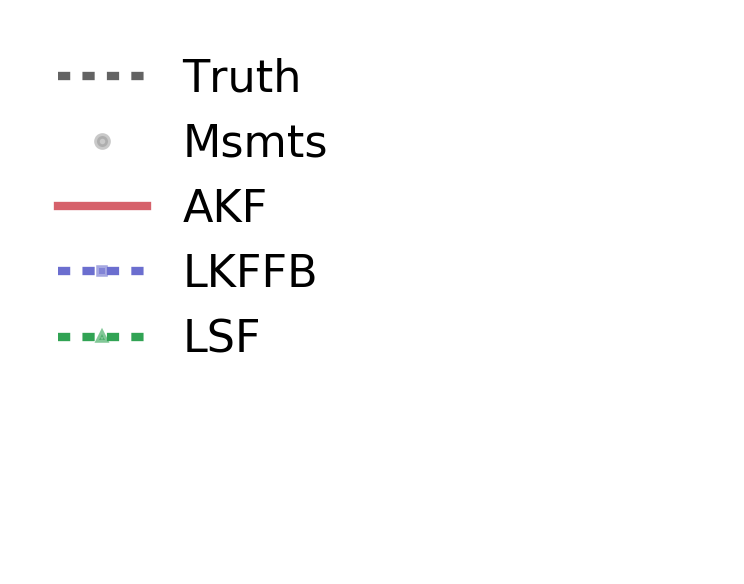

In [5]:
fig1 = plt.figure(figsize=(cm2inch(5),cm2inch(4)), dpi=my_dpi)

ax = fig1.add_subplot(111)
lgd=ax.legend(handles=PRED_H2,
       labels=PRED_L2,
       bbox_to_anchor=(-0.12, 0, 0.0,1.1), loc=2, ncol=1, frameon=True, fontsize=fsize, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(savefig+figname+'lgnd.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()